# Discrete events

In [1]:
import logging
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from numpy import arange

In [2]:
from pNeuma_simulator import params
from pNeuma_simulator.initialization import PoissonDisc

In [133]:
warnings.filterwarnings("ignore")
rcParams.update(
    {
        "pdf.fonttype": 42,
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "Helvetica"],
        "mathtext.fontset": "stix",
        "mathtext.default": "regular",
        "font.size": 7,
        "axes.titlesize": 7,
        "xtick.labelsize": 6,
        "ytick.labelsize": 6,
        "axes.linewidth": 0.25,
        "xtick.major.width": 0.25,
        "ytick.major.width": 0.25,
        "xtick.minor.width": 0.25,
        "ytick.minor.width": 0.25,
    }
)
# LaTeX packages
plt.rc("text", usetex=False)
plt.rc(
    "text.latex",
    preamble=r"\usepackage{amsmath}",
)
plt.rc("text.latex", preamble=r"\usepackage{gensymb}")
dark_blue = "#1964B0"
dark_teal = "#008A69"
vermilion = "#DB5829"
orange = "#F4A637"
maroon = "#894B45"
dark_purple = "#882D71"
light_purple = "#D2BBD7"
grey = "#DEDEDE"

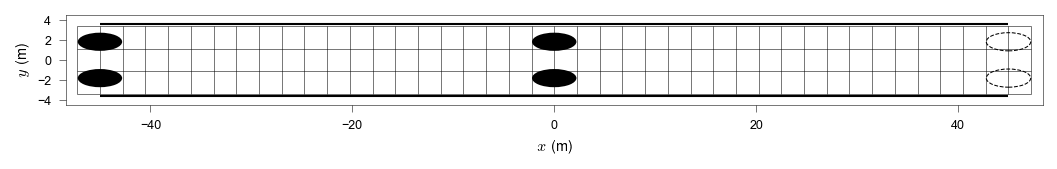

In [134]:
# Pseudorandom number generator
seed = 1024
rng = np.random.default_rng(seed)
n_cars = 2  # 14
n_moto = 0  # 12
# k = params.k
k = 128
sampler = PoissonDisc(
    n_cars, n_moto, cell=params.cell, L=params.L, W=params.cell * 3, k=k, clearance=params.clearance, rng=rng
)
samples, images = sampler.sample(rng)
c_samples = samples[: 2 * n_cars]
m_samples = samples[2 * n_cars :]
markings = arange(-sampler.W / 2, 3 * sampler.W / 4, sampler.W / 2)

fig, ax = plt.subplots(figsize=(2 * 8.7 * params.cm, 2.5 * params.cm), dpi=150)
ax.set_aspect("equal")
for sample in samples:
    if sample in c_samples:
        sample.styles = {"ec": "none", "fc": "k", "fill": True, "lw": 0.6}
    else:
        sample.styles = {"ec": "k", "fill": False, "lw": 0.5}
    sample.draw(ax)
for image in images:
    image.styles = {"ec": "k", "fill": False, "lw": 0.5, "ls": "--"}
    image.draw(ax)
for m_sample in rng.choice(m_samples, n_moto, replace=False):
    m_sample.styles = {"ec": "none", "fc": "k", "fill": True, "lw": 0.5}
    m_sample.draw(ax)
ax.hlines(
    [-params.lane, params.lane],
    xmin=-sampler.width / 2,
    xmax=sampler.width / 2,
    color="k",
    ls="-",
    lw=1,
)
ax.vlines(
    sampler.x_boundaries,
    ymin=-3 * sampler.cell / 2,
    ymax=3 * sampler.cell / 2,
    color="k",
    lw=0.25,
)
ax.hlines(
    sampler.y_boundaries,
    xmin=-sampler.nx * sampler.cell / 2,
    xmax=sampler.nx * sampler.cell / 2,
    color="k",
    lw=0.25,
)
plt.xlim(-(sampler.nx + 1) * sampler.cell / 2, (sampler.nx + 1) * sampler.cell / 2)
plt.ylim(-2 * sampler.cell, 2 * sampler.cell)
ax.set_xlabel("$x$ (m)", usetex=True)
ax.set_ylabel("$y$ (m)", usetex=True)
ax.set_yticks(arange(-4, 5, 2))
fig.tight_layout(pad=0)
# if n_moto == 0:
#    plt.savefig(f"darts_c{n_cars}m{n_moto}.pdf", format="pdf", transparent=True)
# else:
#    plt.savefig(f"darts_c{n_cars}m{n_moto}k{k}.pdf", format="pdf", transparent=True)

In [135]:
merger = samples[-2]

In [196]:
gamma = 15
x_m = merger.x
y_m = merger.y
x_d = params.lane / np.tan(np.radians(gamma))
y_d = params.lane + y_m
x_c = x_d / 2
y_c = 0
x_0 = x_m
y_0 = (y_m + y_c) / 2 - (x_c - x_m) / (y_c - y_m) * (x_m - (x_m + x_c) / 2)
R = y_0 - y_m
theta = np.arcsin((x_c - x_0) / R)

In [199]:
from matplotlib.patches import Arc

radius = R

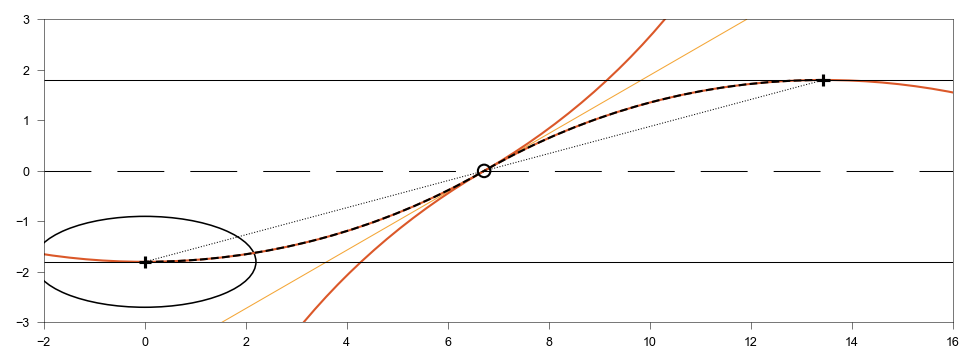

In [213]:
fig, ax = plt.subplots(figsize=(16 * params.cm, 6 * params.cm), dpi=150)
xmin = -2
xmax = 16
ymin = -3
ymax = 3
ax.set_aspect("equal")
ax.hlines((-params.lane / 2, 0, params.lane / 2), xmin=xmin, xmax=xmax, color="k", lw=0.5, ls=["-", (0, (45, 25)), "-"])
plt.axline((x_c, y_c), slope=np.tan(theta), c=orange, lw=0.5, zorder=-1)
merger.styles = {"ec": "k", "fc": "none", "fill": False, "lw": 0.75}
merger.draw(ax)
circle1 = plt.Circle((x_0, y_0), R, ec=vermilion, fc="none")
circle2 = plt.Circle((x_d, -y_0), R, ec=vermilion, fc="none")
arc1 = Arc((x_0, y_0), R * 2, R * 2, theta1=-90, theta2=-90 + np.degrees(theta), zorder=100, color="k", ls="--")
arc2 = Arc((x_d, -y_0), R * 2, R * 2, theta1=90, theta2=90 + np.degrees(theta), zorder=100, color="k", ls="--")
ax.add_patch(arc1)
ax.add_patch(arc2)
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.scatter(x_m, y_m, marker="+", ec="k", fc="none", zorder=10)
plt.scatter(x_c, y_c, marker="o", ec="k", fc="none", zorder=10)
plt.scatter(x_d, y_d, marker="+", ec="k", fc="none", zorder=10)
plt.plot((x_m, x_d), (y_m, y_d), c="k", lw=0.5, ls=":")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
fig.tight_layout(pad=0)